<a href="https://colab.research.google.com/github/lblum95/AML/blob/master/task2/Jannik_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

## Import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


## Pre-process data

### Import libraries

In [2]:
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.naive_bayes import GaussianNB

### Import data

In [4]:
x_train = pd.read_csv("data/X_train.csv",index_col=0,header = 0)
y_train = pd.read_csv("data/y_train.csv",index_col=0,header = 0)
x_test = pd.read_csv("data/X_test.csv",index_col=0,header = 0)

### Preprocess data

In [5]:
y_first=y_train['y'].replace(2,0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# First classification

## Feature selection

### Amount of good features

In [11]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='linear', class_weight='balanced',decision_function_shape='ovo', random_state=36)
selector = RFECV(svc, step=5, scoring='balanced_accuracy', verbose=5)
selector = selector.fit(x_train, y_first)
selector.support_


selector.ranking_

Fitting estimator with 1000 features.
Fitting estimator with 995 features.
Fitting estimator with 990 features.
Fitting estimator with 985 features.
Fitting estimator with 980 features.
Fitting estimator with 975 features.
Fitting estimator with 970 features.
Fitting estimator with 965 features.
Fitting estimator with 960 features.
Fitting estimator with 955 features.
Fitting estimator with 950 features.
Fitting estimator with 945 features.
Fitting estimator with 940 features.
Fitting estimator with 935 features.
Fitting estimator with 930 features.
Fitting estimator with 925 features.
Fitting estimator with 920 features.
Fitting estimator with 915 features.
Fitting estimator with 910 features.
Fitting estimator with 905 features.
Fitting estimator with 900 features.
Fitting estimator with 895 features.
Fitting estimator with 890 features.
Fitting estimator with 885 features.
Fitting estimator with 880 features.
Fitting estimator with 875 features.
Fitting estimator with 870 features.


array([150, 145,  20,   1, 162,  43,  34,  48,  54, 117, 110, 131,  53,
       133,   6,  59,  76,  44,  29,  92, 182, 147,  42, 129,   1, 112,
        80,  40, 113, 190,  88, 105, 147, 141, 147,  74, 153,  87, 142,
       185,  87, 165, 172, 104, 101, 106, 156, 150,  84,  86,  30,  59,
        95, 188,  27,   4, 188,  57,  20, 148, 173, 119,  56,  51,  98,
       117,  50,  10,   1,  97,   1,  95, 109, 141, 133,  22,  65,  50,
       159, 190,  51, 174,  37, 126, 152,   1,  72,  25, 119, 107, 134,
        67,  70,  60,   3,  11,  78,  84, 186, 138,  84,  44, 162, 172,
         1,  38, 183,  56, 149,  89,   1, 167, 152,  64,  42,  81,   1,
         4,  49, 156, 116, 105,  67,  25, 111, 184,  39,   6,  27,  13,
        31,  83,  68,   6,  34,   1,  78,  56, 152, 118,  21,  91,  40,
       118,  23,  13, 186, 158, 166, 123, 187, 167, 173, 169, 177,  82,
       102, 134,  87,  32, 156, 161, 120, 132,  92, 106,   8, 105,  69,
        73, 131,  30, 158, 157,  70, 104,  30,  85, 135, 106,  8

In [17]:
x_train=selector.transform(x_train)

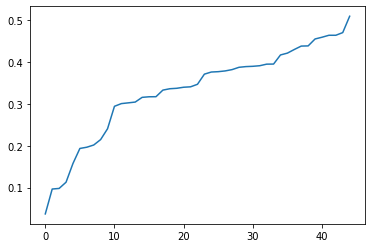

In [18]:
p=[]
for i in range(x_train.shape[1]):
  p.append(abs(stats.pearsonr(x_train[:,i], y_first)[0]))
p.sort()
plt.plot(p)
plt.show()

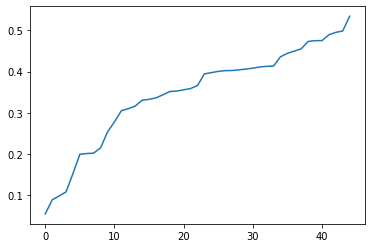

In [19]:
p=[]
for i in range(x_train.shape[1]):
  p.append(abs(stats.spearmanr(x_train[:,i], y_first)[0]))
p.sort()
plt.plot(p)
plt.show()

In [16]:
q=[value for value in p if value>0.45]
len(q)

50

### Import libraries

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Feature selection

In [ ]:
kbest = SelectKBest(f_classif,k=106).fit(x_train,y_first)
X_train = kbest.transform(x_train)
X_test = kbest.transform(x_test)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_first, test_size=0.2, random_state=36)

## SVC

{'C': 1, 'kernel': 'linear'}


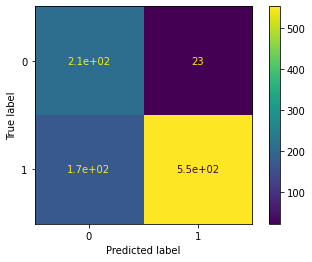

In [22]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100]}

svc = SVC(class_weight='balanced',decision_function_shape='ovo', random_state=36)
clf1 = GridSearchCV(estimator=svc, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf1.fit(X_train, y_train)
print(clf1.best_params_)
plot_confusion_matrix(clf1, X_val, y_val)
plt.show() 

{'C': 1, 'degree': 3}


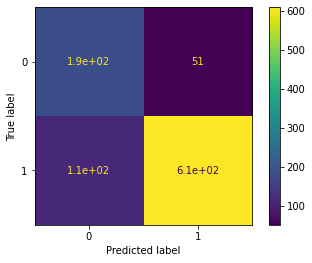

In [24]:
parameters = {'degree':[2,3,5,10], 'C':[0.1, 1, 10, 100]}

svc = SVC(kernel='poly',class_weight='balanced',decision_function_shape='ovo', random_state=36)
clf1 = GridSearchCV(estimator=svc, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf1.fit(X_train, y_train)
print(clf1.best_params_)
plot_confusion_matrix(clf1, X_val, y_val)
plt.show() 

## Decision tree

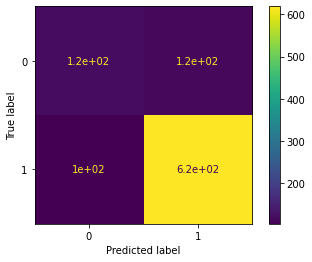

In [25]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)
tree.fit(X_train, y_train)
plot_confusion_matrix(tree, X_val, y_val)
plt.show() 

In [ ]:
tree.score(X_val,y_val)

0.759375

## Nearest Neighbor

{'n_neighbors': 5}


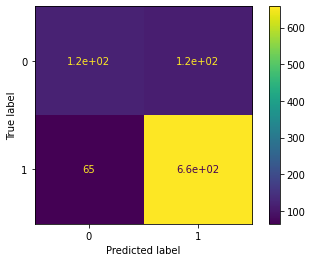

In [26]:
parameters = {'n_neighbors':[1, 3, 5]}
neigh = KNeighborsClassifier(n_neighbors=3)
clf = GridSearchCV(estimator=neigh, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)
plot_confusion_matrix(clf, X_val, y_val)
plt.show() 

## Naive Bayes

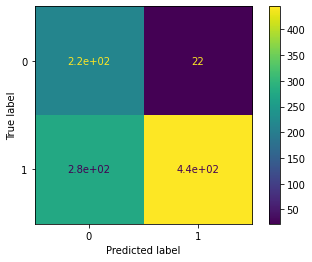

In [27]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB(priors=[1/4,3/4])
gauss.fit(X_train, y_train)
plot_confusion_matrix(gauss, X_val, y_val)
plt.show() 

## Gaussian Process

{'n_neighbors': 5}


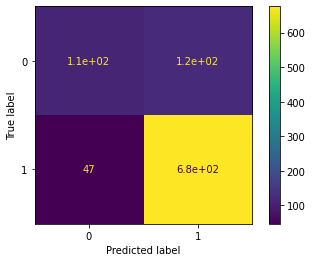

In [ ]:
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, Matern, ExpSineSquared, RationalQuadratic
from sklearn.gaussian_process import GaussianProcessClassifier

parameters = {'kernel':[WhiteKernel, RBF, Matern, ExpSineSquared, RationalQuadratic]}
proc = GaussianProcessClassifier(random_state=36)
proc = GridSearchCV(estimator=proc, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)
plot_confusion_matrix(clf, X_val, y_val)
plt.show() 